# **Análise de Dados: Turbina Eólica**  <h1>


### **Bibliotecas:** <h3>

In [2]:
import pandas as pd;
import seaborn as sns;
import matplotlib.pyplot as plt;
from matplotlib.pyplot import figure;

### **Lendo Arquivo & Tratando** <h3>

In [24]:
data = pd.read_csv("T1.csv");
data.columns = ['Data/Hora', 'ActivePower(Kw)', 'WindSpeed(m/s)', 'TheoreticalCurve(Kw/h)', 'WindDirection(Graus)'];
del data['WindDirection(Graus)'];
data['Data/Hora'] = pd.to_datetime(data['Data/Hora'], format="%d %m %Y %H:%M")


### **Plotando dados em gráfico - Real** <h3>

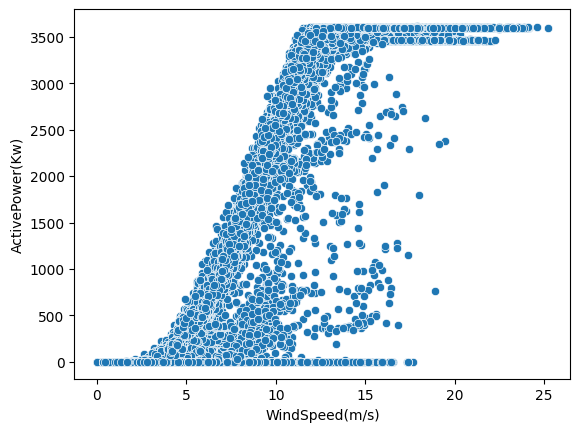

In [23]:
sns.scatterplot(data=data, x='WindSpeed(m/s)', y='ActivePower(Kw)');

### **Plotando dados em gráfico - Teórico** <h3>

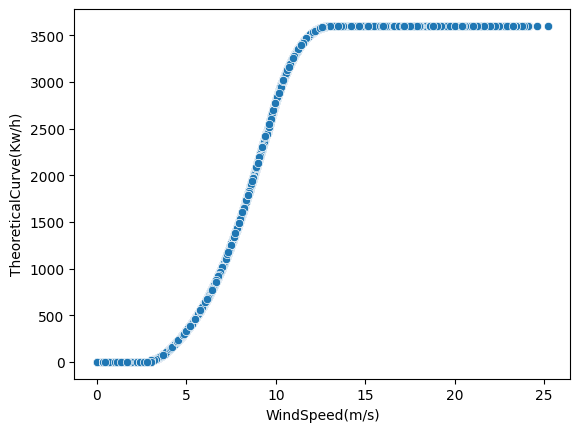

In [25]:
sns.scatterplot(data=data, x='WindSpeed(m/s)', y='TheoreticalCurve(Kw/h)');

### **Limites Aceitáveis** <h3>

In [44]:
#Transformar em listas para facilitar a manipulação
pot_real = data['ActivePower(Kw)'].tolist();
pot_teorica = data['TheoreticalCurve(Kw/h)'].tolist();

#Criar listas para armazenar os valores máximos e mínimos de potência e os valores dentro do limite
pot_max = [];
pot_min = [];
dentro_limite = [];

#Criar listas com os valores máximos e mínimos de potência
for potencia in pot_teorica:
    pot_max.append(potencia * 1.20);
    pot_min.append(potencia - 0.80);
#Criar lista com os valores dentro do limite
for p, pottencia in enumerate(pot_real):
    if pottencia >= pot_min[p] and pottencia <= pot_max[p]:
       dentro_limite.append('Dentro');
    elif pottencia == 0:
       dentro_limite.append('Zero');
    else:
         dentro_limite.append('Fora');

print(dentro_limite.count('Dentro')/len(dentro_limite)*100);

26.507025529388486



### **Adicionando ao dataframe: lista(dentro_limite)** <h3>

In [45]:
data['DentroLimite'] = dentro_limite;


### **Gráfico com Limite** <h3>

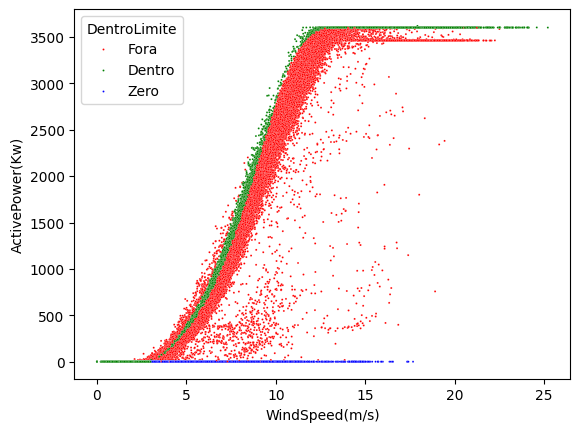

In [46]:
cores = {'Dentro': 'green', 'Fora': 'red', 'Zero': 'blue'}
sns.scatterplot(data=data, x='WindSpeed(m/s)', y='ActivePower(Kw)', hue='DentroLimite', s=2, palette= cores);